In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#for edv (Base)
def EDV(alt,state):
    A = np.random.randint(-100,100,size=(alt,state)) #declare payoff and random prob vector
    pj = np.random.normal(state,size=(state,1))
    pj=pj/np.sum(pj)
    
    M = A@pj #EDV
    m=float(max(M))
    Ap = [item for sublist in A for item in sublist]
    D=[]
    for i in Ap:
        if i>=m:
            D.append(0)
        else:
            D.append(m-i)
    D=np.array(D).reshape(alt,state) #dissapointment matrix
    
    edv = D@pj
    m_edv= float(min(edv)) #EVWPI and EVPI
    ee= D.min(axis=0)
    ee=np.array(ee).reshape(1,state)
    
    evwpi=ee@pj
    evpi = m_edv-evwpi
    return evpi
    

In [2]:
#for edv and erv
def EDV_ERV(alt,state):
    A = np.random.randint(-100,100,size=(alt,state)) #declare payoff and random prob vector
    pj = np.random.normal(state,size=(state,1))
    pj=pj/np.sum(pj)
    
    M = A@pj #EDV
    m=float(max(M))
    Ap = [item for sublist in A for item in sublist]
    D=[]
    for i in Ap:
        if i>=m:
            D.append(0)
        else:
            D.append(m-i)
    D=np.array(D).reshape(alt,state) #dissapointment matrix
    
    edv = D@pj
    m_edv= float(min(edv)) #EVWPI and EVPI
    ee= D.min(axis=0)
    ee=np.array(ee).reshape(1,state)
    
    evwpi=ee@pj
    evpi_edv = m_edv-float(evwpi)
    
    R=[] #regret
    for i in range(0,state):
        regret=(max(A[:,i])-A[:,i])
        R.append(regret)
    K=[item for sublist in R for item in sublist]
    RE=np.array(K).reshape(state,alt)
    REG=np.transpose(RE)
    
    e_reg = REG@pj   #EVWPI AND EVPI FOR REGRET
    mreg = float(min(e_reg)) 
    eerv = A.max(axis=0)
    evwpier=np.array(eerv).reshape(1,state)
    evwpi_er=evwpier@pj
    evpi_er=float(evwpi_er)-m
    
    return evpi_edv, evpi_er
    
    

In [3]:
#declaring a repeat function
def repeat(alg,alt,state,times):
    DV=[]
    for i in range(times):
        output=alg(alt,state)
        DV.append(output)
    return DV

In [4]:
altt= int(input('enter number of alternatives:'))
statee=int(input('enter number of states:'))
iterr=int(input('enter number of iterations: '))


enter number of alternatives:10
enter number of states:5
enter number of iterations: 100


In [5]:
Data = repeat(EDV_ERV,altt,statee,iterr)

<AxesSubplot:>

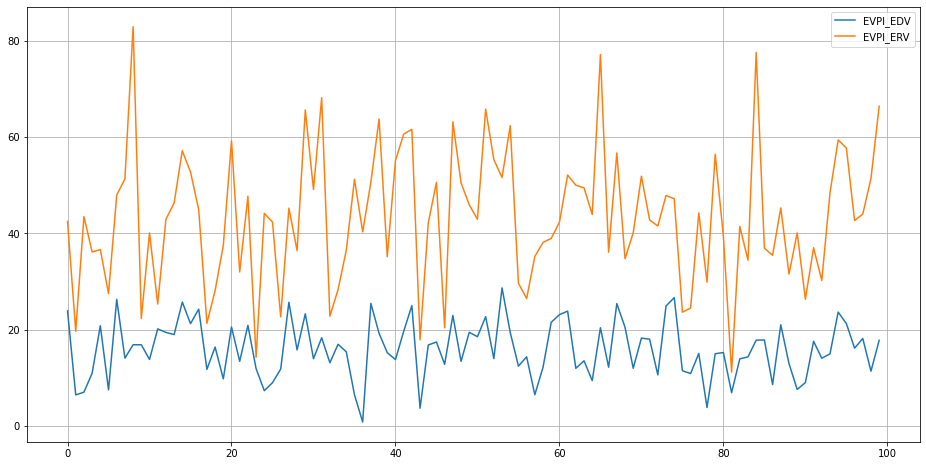

In [6]:
df=pd.DataFrame(Data,columns=['EVPI_EDV','EVPI_ERV']);df
df.plot(figsize=(16,8),grid=True)

In [7]:
df['iter']=list(range(0,iterr));df.head()

,EVPI_EDV,EVPI_ERV,iter
0,23.921568,42.480320,0
1,6.484993,19.681960,1
2,7.041472,43.470905,2
3,10.980951,36.130505,3
4,20.832546,36.645002,4


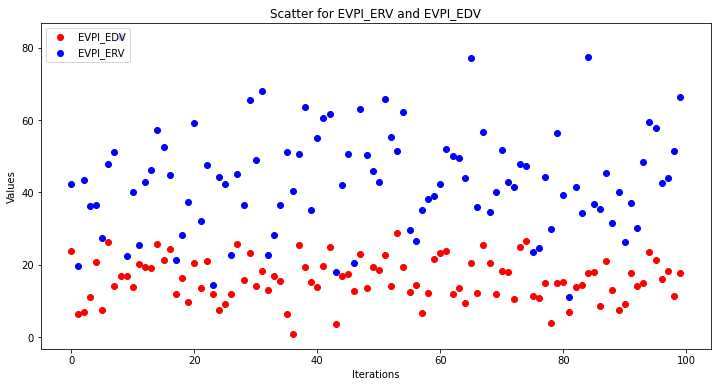

In [8]:
plt.figure(figsize=(12,6))
plt.scatter(df['iter'],df['EVPI_EDV'], color='red',label='EVPI_EDV')
plt.scatter(df['iter'],df['EVPI_ERV'], color='blue',label='EVPI_ERV')
plt.legend(loc='upper left')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('Scatter for EVPI_ERV and EVPI_EDV')
plt.show()

In [9]:
#rate of error
error = df['EVPI_EDV']>df['EVPI_ERV'] #if expected regret value yields a lower evpi
exp = df['EVPI_EDV']<df['EVPI_ERV']#if otherwise (as expected).
same = df['EVPI_EDV'] == df['EVPI_ERV']#same

df.loc[error,'error']=1 #hit 1 if error happens
df.loc[exp,'error']=0 #hit none, if only expectations are present
df.loc[same,'error']=0 #if same, then 0
df

,EVPI_EDV,EVPI_ERV,iter,error
0,23.921568,42.480320,0,0.0
1,6.484993,19.681960,1,0.0
2,7.041472,43.470905,2,0.0
3,10.980951,36.130505,3,0.0
4,20.832546,36.645002,4,0.0
...,...,...,...,...
95,21.280705,57.706459,95,0.0
96,16.180787,42.659936,96,0.0
97,18.191675,44.003579,97,0.0
98,11.402030,51.393100,98,0.0


In [10]:
print('rate of error is:',(error.sum()/len(error))*100,'%')

rate of error is: 0.0 %


In [11]:
error.sum()

0

In [12]:
len(error)

100

In [13]:
dfn=df[df.error==1];dfn

,EVPI_EDV,EVPI_ERV,iter,error
